## Linear Regression using NASDAQ stock prices from 1971 to now.

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('nasdaq.csv') ## We would want to predict future closing prices using Adjusted closing costs.
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0


<function matplotlib.pyplot.show(close=None, block=None)>

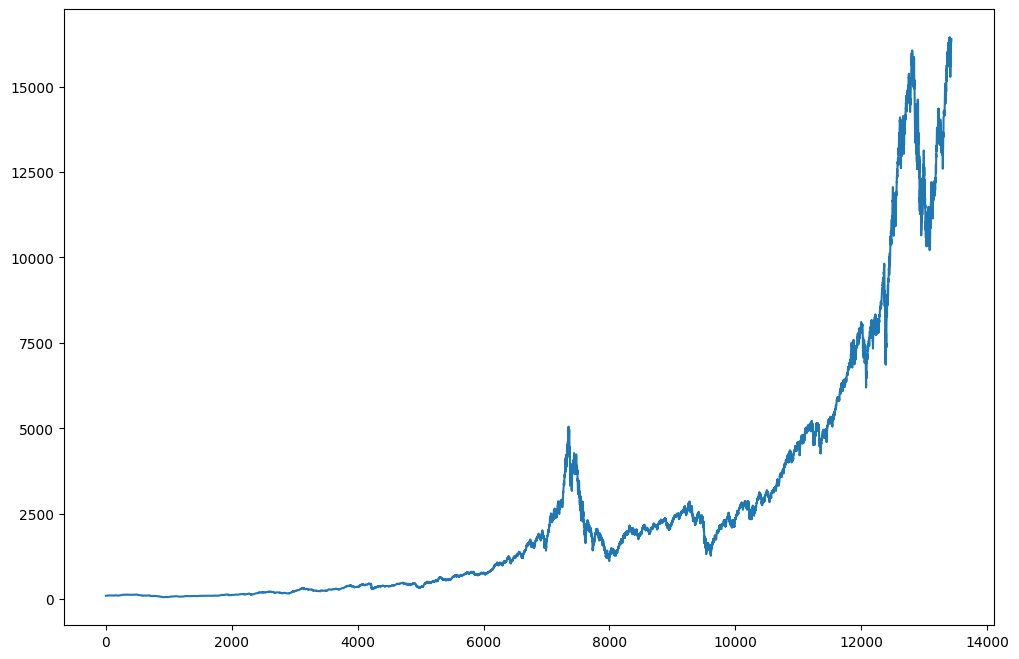

In [90]:
plt.figure(figsize=(12,8)) ## Plot Adjusted Closing costs
plt.plot(df['Adj Close'])
plt.show


In [91]:
## Predictors: High, Low, Open, Volume (x)
## Responses: Adjusted Close Price (y)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

x = df[['Open', 'High', 'Low', 'Volume']]  
y = df['Adj Close']
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(xTrain, yTrain)

LinearRegression()

In [92]:
# Regression Coefficents 
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-7.48935915e-01  9.00274253e-01  8.48871858e-01  2.01665573e-10]
0.11348964923308813


Linear Regression Equation: (As Estimators)
$$
\hat{y} = 0.113 - 0.749\hat{\beta_1}\ + 0.900\hat{\beta_2}\ + 0.849\hat{\beta_3}\ + 0.202e^{-10}\hat{\beta_4}
$$

Most Likely last coefficent  very low mainly due to multicolinearity with respect to correlation of the predictors and response variables when NASDAQ was in it's beginning stages in the early to mid-70s.

In [93]:
## Prediction value
pred_val = lin_reg.predict(xTest) 
print(xTest.shape)
print(xTrain.shape)


(2687, 4)
(10746, 4)


In [94]:
# Compare Actual values to prediction values
newDF = pd.DataFrame({"Original Values": yTest, "Predicted Values": pred_val})
print(newDF)

       Original Values  Predicted Values
3730        302.299988        301.978945
7584       2489.659912       2484.535013
579         104.269997        104.405404
12963     11028.740234      10984.979381
13022     10867.929688      10774.455794
...                ...               ...
10784      3922.040039       3915.231214
7691       2067.320068       2054.278767
6342       1073.050049       1068.389199
11568      5463.830078       5480.705678
3941        346.799988        352.576579

[2687 rows x 2 columns]


In [95]:
# Regressor Score
lin_reg.score(xTest, yTest)

0.999965629275184

In [96]:
## Finding MAE and MSPE
from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(yTest, pred_val)
print("Mean Absolute Error (MAE): ", mean_abs_error)
mean_squared_error = metrics.mean_squared_error(yTest, pred_val)
print("Mean Squared Error (MSPE): ", mean_squared_error)
print("R^2 Error: ", metrics.r2_score(yTest, pred_val))

Mean Absolute Error (MAE):  8.539956159136258
Mean Squared Error (MSPE):  432.6546492783858
R^2 Error:  0.999965629275184


In [97]:
pred_val_revised = lin_reg.predict(x)

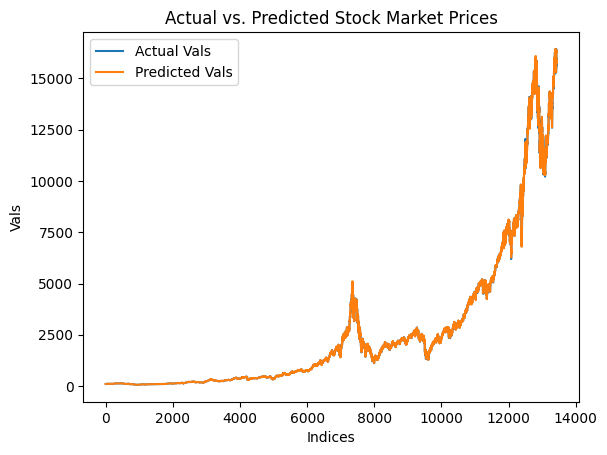

In [98]:
# Plot the graph of Actual vs. Predicted Stock Market Prices
plt.plot(y, label="Actual Vals")
plt.plot(pred_val_revised, label="Predicted Vals")
plt.xlabel("Indices")
plt.ylabel("Vals")
plt.title("Actual vs. Predicted Stock Market Prices")
plt.legend()
plt.show()

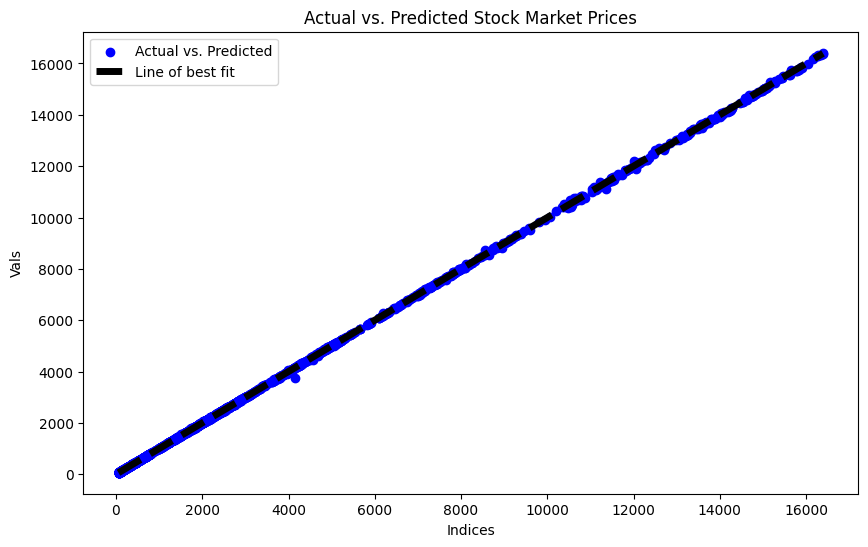

In [99]:
## Compare it with Regression Line in terms of Predictions made from Linear Regression
plt.figure(figsize=(10,6))
plt.scatter(yTest, pred_val, color="blue", label="Actual vs. Predicted")
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], 'k--', lw=5, label = "Line of best fit")
plt.xlabel("Indices")
plt.ylabel("Vals")
plt.title("Actual vs. Predicted Stock Market Prices")
plt.legend()
plt.show()

The data points from the regression line fits the line of best fit almost perfectly, considering that the predicted R squared value turned out to be:
$$
{R^2 = 0.998}
$$ 
In addition to that, the regression line also indicates that the residuals have nonconstant variability around 0 and it follows a Normal (Gaussian) Distribution